In [89]:
#Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [97]:
#Read and clean data
df = pd.read_csv('./df_6dB_pump_fe_ta_imb.csv')
df.drop(['Unnamed: 0'],axis = 1, inplace = True)
df.drop(df.iloc[:,13:], axis=1, inplace = True)

In [98]:
df.columns

Index(['mfccs0', 'mfccs1', 'mfccs2', 'mfccs3', 'mfccs4', 'mfccs5', 'mfccs6',
       'mfccs7', 'mfccs8', 'mfccs9', 'mfccs10', 'mfccs11', 'mfccs12'],
      dtype='object')

In [99]:
# K-means clustering

In [100]:
# z-score normalisation
metrics_normalized=(df-df.mean())/df.std()
metrics_normalized = metrics_normalized.rename(columns={'mfccs0': 'mfccs0_zscore',
                                                        'mfccs1': 'mfccs1_zscore',
                                                        'mfccs2': 'mfccs2_zscore',
                                                        'mfccs3': 'mfccs3_zscore',
                                                        'mfccs4': 'mfccs4_zscore',
                                                        'mfccs5': 'mfccs5_zscore',
                                                        'mfccs6': 'mfccs6_zscore',
                                                        'mfccs7': 'mfccs7_zscore',
                                                        'mfccs8': 'mfccs8_zscore',
                                                        'mfccs9': 'mfccs9_zscore',
                                                        'mfccs10': 'mfccs10_zscore',
                                                        'mfccs11': 'mfccs11_zscore',
                                                        'mfccs12': 'mfccs12_zscore'})

In [101]:

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=2, init='k-means++').fit(metrics_normalized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
metrics_normalized = metrics_normalized.join(cluster_labels.to_frame())

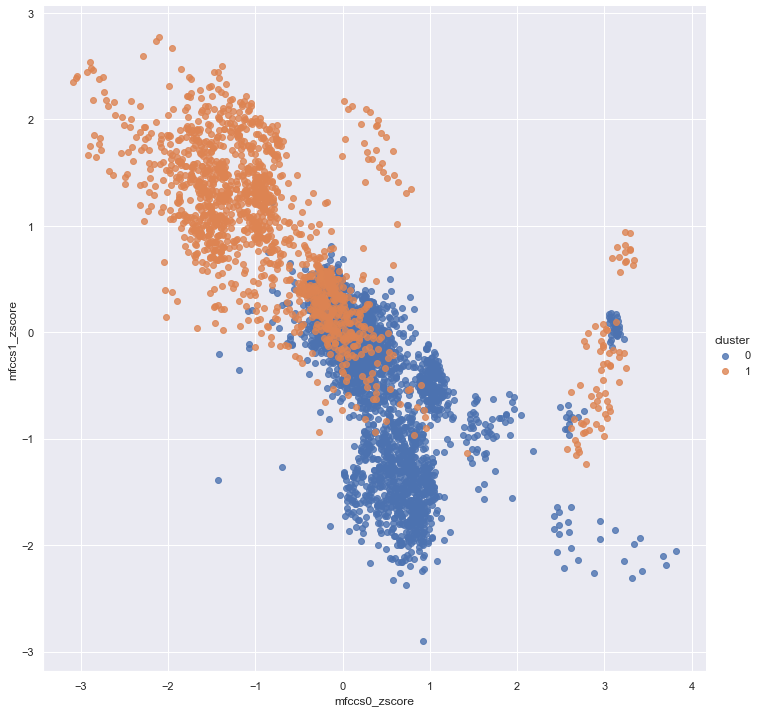

In [102]:
sns.lmplot(x='mfccs0_zscore', y='mfccs1_zscore',  height=10, data=metrics_normalized,
           fit_reg=False, hue='cluster')

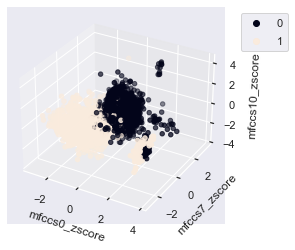

In [103]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

df = metrics_normalized


fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['mfccs0_zscore']
y = df['mfccs7_zscore']
z = df['mfccs10_zscore']

ax.set_xlabel("mfccs0_zscore")
ax.set_ylabel("mfccs7_zscore")
ax.set_zlabel("mfccs10_zscore")


sc = ax.scatter(x, y, z, marker='o',  c=kmeans.labels_)
# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()